In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar

# Reading the CSV files
gum_bleeding_1_num = pd.read_csv('D:\\DSPH\\Gum-Bleeding.csv')
gum_bleeding_2_num = pd.read_csv('D:\\DSPH\\Gum bleeding 2.csv')

# Convert "Yes"/"No" to 1/0 for both datasets
gum_bleeding_1_num = gum_bleeding_1_num.replace({'Yes': 1, 'No': 0}).drop('Weeks', axis=1)
gum_bleeding_2_num = gum_bleeding_2_num.replace({'Yes': 1, 'No': 0}).drop('Weeks', axis=1)

# Function to create a contingency table and apply McNemar's test
def perform_mcnemars_test(participant_data_1, participant_data_2):
    # Create a contingency table
    a = ((participant_data_1 == 0) & (participant_data_2 == 0)).sum()
    b = ((participant_data_1 == 0) & (participant_data_2 == 1)).sum()
    c = ((participant_data_1 == 1) & (participant_data_2 == 0)).sum()
    d = ((participant_data_1 == 1) & (participant_data_2 == 1)).sum()
    
    table = [[a, b], [c, d]]
    
    # Apply McNemar's test
    result = mcnemar(table, exact=True)
    
    return table, result.pvalue

# Apply McNemar's test for each participant and store results
mcnemars_results = {}
for participant in gum_bleeding_1_num.columns:
    # Ensure both datasets have the same length by trimming or padding the second dataset
    participant_data_1 = gum_bleeding_1_num[participant]
    participant_data_2 = gum_bleeding_2_num[participant][:len(participant_data_1)]
    
    table, p_value = perform_mcnemars_test(participant_data_1, participant_data_2)
    mcnemars_results[participant] = {'table': table, 'p-value': p_value}

# Display the results
for participant, result in mcnemars_results.items():
    print(f"Participant: {participant}, Contingency Table: {result['table']}, p-value: {result['p-value']}")


Participant: participant 1, Contingency Table: [[9, 1], [6, 0]], p-value: 0.125
Participant: participant 2, Contingency Table: [[12, 2], [2, 0]], p-value: 1.0
Participant: participant 3, Contingency Table: [[10, 2], [4, 0]], p-value: 0.6875
Participant: participant 4, Contingency Table: [[9, 0], [7, 0]], p-value: 0.015625
Participant: participant 5, Contingency Table: [[14, 0], [2, 0]], p-value: 0.5


#visualization

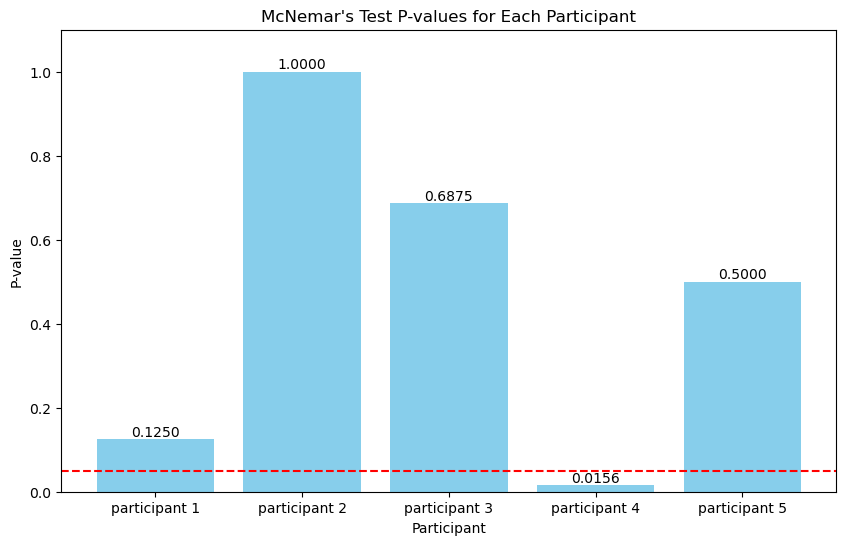

In [7]:
# E corresponding p-values
participants = list(mcnemars_results.keys())
p_values = [mcnemars_results[participant]['p-value'] for participant in participants]

# Creating the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(participants, p_values, color='skyblue')

# Adding a horizontal line for the typical significance level (alpha = 0.05)
plt.axhline(y=0.05, color='r', linestyle='--')

# Annotating the p-values above the bars
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{p_value:.4f}", 
             ha='center', va='bottom')

# Setting the plot title and labels
plt.title('McNemar\'s Test P-values for Each Participant')
plt.xlabel('Participant')
plt.ylabel('P-value')
plt.ylim(0, 1.1) 

# Showing the plot
plt.show()
